<a href="https://colab.research.google.com/github/Hameon4/Tensorflow-2.0-Practice/blob/main/Tf2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-07-18 14:08:51--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-07-18 14:08:51 (36.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
# Load in the data 
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # turn it to a 2-D array of size N x D where D = 1
Y = data[:,1]

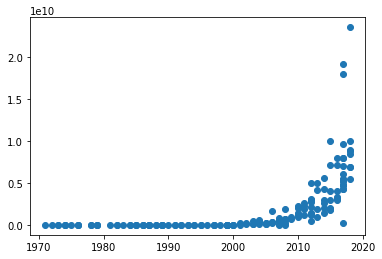

In [4]:
# Plot the data - exponential
plt.scatter(X, Y);

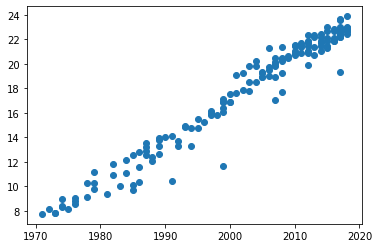

In [5]:
# To make a linear model, take its log
Y = np.log(Y)
plt.scatter(X, Y);

In [6]:
# Try centering the X data so the values are not too large 
# Scaling can be done but then reversing the transformation had to be done later
X = X - X.mean()

In [7]:
# Create the tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [9]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [10]:
# Train the model 
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 408.4111 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 422.9407 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 383.0210 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 413.6960 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 206.0022 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 110.6825 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 83.8698 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 67.3908 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 48.7553 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 37.9966 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 3

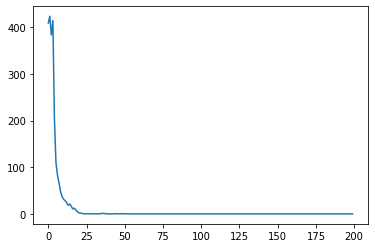

In [11]:
# Plot the loss
plt.plot(r.history['loss'], label='loss');

In [12]:
# Get the trained weights of the model
# Acquire the slope of the line
print(model.layers) # There's only one layer. The "Input" layer doesn't count
print(model.layers[0].get_weights());

[array([[0.33868605]], dtype=float32), array([17.763893], dtype=float32)]


In [13]:
# The slope of the line
a = model.layers[0].get_weights()[0][0, 0]

In [14]:
print(f'Time to double: {np.log(2) / a}')

Time to double: 2.0465773026027736


### **PART 2: MAKING PREDICTIONS**

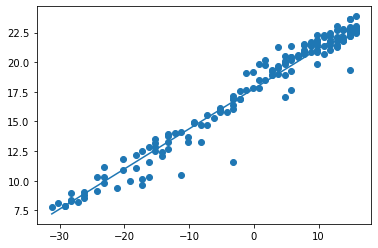

In [15]:
# MAKE SURE THE LINE FITS OUR DATA
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)
# this is like a double confirmation that moore's law is true

In [16]:
# manual calculation: to make sure the dense layer acutally does the calculation [wx + b]

# get the weights
#----[get dense layer]---[get w and b]
w, b = model.layers[0].get_weights()

# reshape X since it was flattened earlier
X = X.reshape(-1, 1)

# Now perform the Linear Transformation wx + b
# (N x 1) x (1 x 1) + 1 --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Do not use '==' for floating pts
np.allclose(Yhat, Yhat2)


True